汇总统计第一步，主要是数据清洗，剔除掉没进一步分析必要的数据

In [1]:
import pandas as pd
import matplotlib
from matplotlib import font_manager
import matplotlib.pyplot as plt
from datetime import datetime
import json
import numpy as np
import cnfundutils
import libtrdb2

import plotly.express as px

cnfundutils.init2()

trdb2cfg = libtrdb2.loadConfig('./trdb2.yaml')

FUNDRESULTS_PATH = './calcfundfull.csv'
dfFundResults = cnfundutils.loadFundResult(FUNDRESULTS_PATH)

FUNDS_PATH = './funds.xlsx'
dfFunds = cnfundutils.loadFundBasicInfo(FUNDS_PATH)

先简单看看数据

In [2]:
dfFunds

code           name            tags  createtime  \
0     000001         华夏成长混合  开放式; 混合型 ; 高风险  2001-12-18   
1     000003       中海可转债债券A  开放式; 债券型 ; 低风险  2013-03-20   
2     000004       中海可转债债券C  开放式; 债券型 ; 低风险  2013-03-20   
3     000005     嘉实增强信用定期债券  开放式; 债券型 ; 低风险  2013-03-08   
4     000006     西部利得量化成长混合  开放式; 混合型 ; 高风险  2019-03-19   
...      ...            ...             ...         ...   
8378  968051  摩根国际债券人民币对冲派息  开放式; 债券型 ; 低风险  2019-03-29   
8379  968052    摩根国际债券人民币累计  开放式; 债券型 ; 低风险  2019-03-29   
8380  968053    摩根国际债券人民币派息  开放式; 债券型 ; 低风险  2019-03-29   
8381  968054     摩根国际债券美元累计  开放式; 债券型 ; 低风险  2019-03-29   
8382  968055     摩根国际债券美元派息  开放式; 债券型 ; 低风险  2019-03-29   

                                      size       company  \
0     [{"size":38.8478,"time":1601716484}]    华夏基金管理有限公司   
1       [{"size":0.667,"time":1601716483}]    中海基金管理有限公司   
2      [{"size":0.5437,"time":1601716489}]    中海基金管理有限公司   
3      [{"size":0.5634,"time":1601716568}]    嘉实基金管理有限公司   
4      [{"size":2.5372,"time":1601716483}]  西部利得基金管理有限公司   
...                                    ...           ...   
8378                 [{"time":1601730313}]  摩根基金(亚洲)有限公司   
8379                 [{"time":1601730311}]  摩根基金(亚洲)有限公司   
8380                 [{"time":1601730317}]  摩根基金(亚洲)有限公司   
8381                 [{"time":1601730321}]  摩根基金(亚洲)有限公司   
8382                 [{"time":1601716905}]  摩根基金(亚洲)有限公司   

                                               managers  values  
0     [{"name":"王亚伟","startTime":1008633600,"endTime...    4551  
1     [{"name":"周其源","startTime":1363737600,"endTime...    1818  
2     [{"name":"周其源","startTime":1363737600,"endTime...    1818  
3     [{"name":"刘宁","startTime":1362700800,"educatio...    1849  
4     [{"name":"盛丰衍","startTime":1552953600,"sex":tr...     377  
...                                                 ...     ...  
8378                                                NaN     359  
8379                                                NaN     359  
8380                                                NaN     359  
8381                                                NaN     359  
8382                                                NaN     359  

[8383 rows x 8 columns]

我们可以看到，类型是用分号分隔的字符串，看起来应该是3种分类，分别是 是否开放式基金、具体类型，以及风险程度，那么我们先处理一下类型

In [3]:
cnfundutils.procFundBasicInfoTypes(dfFunds)
dfFunds

code           name            tags  createtime  \
0     000001         华夏成长混合  开放式; 混合型 ; 高风险  2001-12-18   
1     000003       中海可转债债券A  开放式; 债券型 ; 低风险  2013-03-20   
2     000004       中海可转债债券C  开放式; 债券型 ; 低风险  2013-03-20   
3     000005     嘉实增强信用定期债券  开放式; 债券型 ; 低风险  2013-03-08   
4     000006     西部利得量化成长混合  开放式; 混合型 ; 高风险  2019-03-19   
...      ...            ...             ...         ...   
8378  968051  摩根国际债券人民币对冲派息  开放式; 债券型 ; 低风险  2019-03-29   
8379  968052    摩根国际债券人民币累计  开放式; 债券型 ; 低风险  2019-03-29   
8380  968053    摩根国际债券人民币派息  开放式; 债券型 ; 低风险  2019-03-29   
8381  968054     摩根国际债券美元累计  开放式; 债券型 ; 低风险  2019-03-29   
8382  968055     摩根国际债券美元派息  开放式; 债券型 ; 低风险  2019-03-29   

                                      size       company  \
0     [{"size":38.8478,"time":1601716484}]    华夏基金管理有限公司   
1       [{"size":0.667,"time":1601716483}]    中海基金管理有限公司   
2      [{"size":0.5437,"time":1601716489}]    中海基金管理有限公司   
3      [{"size":0.5634,"time":1601716568}]    嘉实基金管理有限公司   
4      [{"size":2.5372,"time":1601716483}]  西部利得基金管理有限公司   
...                                    ...           ...   
8378                 [{"time":1601730313}]  摩根基金(亚洲)有限公司   
8379                 [{"time":1601730311}]  摩根基金(亚洲)有限公司   
8380                 [{"time":1601730317}]  摩根基金(亚洲)有限公司   
8381                 [{"time":1601730321}]  摩根基金(亚洲)有限公司   
8382                 [{"time":1601716905}]  摩根基金(亚洲)有限公司   

                                               managers  values type0 type1  \
0     [{"name":"王亚伟","startTime":1008633600,"endTime...    4551   开放式   高风险   
1     [{"name":"周其源","startTime":1363737600,"endTime...    1818   开放式   低风险   
2     [{"name":"周其源","startTime":1363737600,"endTime...    1818   开放式   低风险   
3     [{"name":"刘宁","startTime":1362700800,"educatio...    1849   开放式   低风险   
4     [{"name":"盛丰衍","startTime":1552953600,"sex":tr...     377   开放式   高风险   
...                                                 ...     ...   ...   ...   
8378                                                NaN     359   开放式   低风险   
8379                                                NaN     359   开放式   低风险   
8380                                                NaN     359   开放式   低风险   
8381                                                NaN     359   开放式   低风险   
8382                                                NaN     359   开放式   低风险   

     type2  createtimey  createtimem  
0      混合型         2001           12  
1      债券型         2013            3  
2      债券型         2013            3  
3      债券型         2013            3  
4      混合型         2019            3  
...    ...          ...          ...  
8378   债券型         2019            3  
8379   债券型         2019            3  
8380   债券型         2019            3  
8381   债券型         2019            3  
8382   债券型         2019            3  

[8383 rows x 13 columns]

基金大小是一个json串，这个我们也处理一下吧

In [4]:
cnfundutils.procFundBasicInfoSize(dfFunds)
dfFunds

code           name            tags  createtime  \
0     000001         华夏成长混合  开放式; 混合型 ; 高风险  2001-12-18   
1     000003       中海可转债债券A  开放式; 债券型 ; 低风险  2013-03-20   
2     000004       中海可转债债券C  开放式; 债券型 ; 低风险  2013-03-20   
3     000005     嘉实增强信用定期债券  开放式; 债券型 ; 低风险  2013-03-08   
4     000006     西部利得量化成长混合  开放式; 混合型 ; 高风险  2019-03-19   
...      ...            ...             ...         ...   
8378  968051  摩根国际债券人民币对冲派息  开放式; 债券型 ; 低风险  2019-03-29   
8379  968052    摩根国际债券人民币累计  开放式; 债券型 ; 低风险  2019-03-29   
8380  968053    摩根国际债券人民币派息  开放式; 债券型 ; 低风险  2019-03-29   
8381  968054     摩根国际债券美元累计  开放式; 债券型 ; 低风险  2019-03-29   
8382  968055     摩根国际债券美元派息  开放式; 债券型 ; 低风险  2019-03-29   

                                      size       company  \
0     [{"size":38.8478,"time":1601716484}]    华夏基金管理有限公司   
1       [{"size":0.667,"time":1601716483}]    中海基金管理有限公司   
2      [{"size":0.5437,"time":1601716489}]    中海基金管理有限公司   
3      [{"size":0.5634,"time":1601716568}]    嘉实基金管理有限公司   
4      [{"size":2.5372,"time":1601716483}]  西部利得基金管理有限公司   
...                                    ...           ...   
8378                 [{"time":1601730313}]  摩根基金(亚洲)有限公司   
8379                 [{"time":1601730311}]  摩根基金(亚洲)有限公司   
8380                 [{"time":1601730317}]  摩根基金(亚洲)有限公司   
8381                 [{"time":1601730321}]  摩根基金(亚洲)有限公司   
8382                 [{"time":1601716905}]  摩根基金(亚洲)有限公司   

                                               managers  values type0 type1  \
0     [{"name":"王亚伟","startTime":1008633600,"endTime...    4551   开放式   高风险   
1     [{"name":"周其源","startTime":1363737600,"endTime...    1818   开放式   低风险   
2     [{"name":"周其源","startTime":1363737600,"endTime...    1818   开放式   低风险   
3     [{"name":"刘宁","startTime":1362700800,"educatio...    1849   开放式   低风险   
4     [{"name":"盛丰衍","startTime":1552953600,"sex":tr...     377   开放式   高风险   
...                                                 ...     ...   ...   ...   
8378                                                NaN     359   开放式   低风险   
8379                                                NaN     359   开放式   低风险   
8380                                                NaN     359   开放式   低风险   
8381                                                NaN     359   开放式   低风险   
8382                                                NaN     359   开放式   低风险   

     type2  createtimey  createtimem    size0  
0      混合型         2001           12 38.84780  
1      债券型         2013            3  0.66700  
2      债券型         2013            3  0.54370  
3      债券型         2013            3  0.56340  
4      混合型         2019            3  2.53720  
...    ...          ...          ...      ...  
8378   债券型         2019            3  0.00000  
8379   债券型         2019            3  0.00000  
8380   债券型         2019            3  0.00000  
8381   债券型         2019            3  0.00000  
8382   债券型         2019            3  0.00000  

[8383 rows x 14 columns]

接下来看看对基金净值数据统计分析后的数据。

In [5]:
dfFundResults

code  nums  totalReturn  maxDrawDown  mddStart    mddEnd  maxDrawup  \
0     000001  4551      2.84700      0.29152  20080114  20081107    3.54896   
1     000003  1818      0.12790      0.56832  20150601  20181018    1.26761   
2     000004  1818      0.12590      0.57032  20150601  20181018    1.28353   
3     000005  1849      0.37000      0.03682  20150615  20150709    0.42551   
4     000006   377      0.81980      0.14627  20200225  20200323    1.07345   
...      ...   ...          ...          ...       ...       ...        ...   
7417  968051   359      0.00000      0.00000  19700101  19700101    0.00000   
7418  968052   359      0.00000      0.00000  19700101  19700101    0.00000   
7419  968053   359      0.00000      0.00000  19700101  19700101    0.00000   
7420  968054   359      0.00000      0.00000  19700101  19700101    0.00000   
7421  968055   359      0.00000      0.00000  19700101  19700101    0.00000   

      mduStart    mduEnd   sharpe  annualizedReturns  annualizedVolatility  \
0     20030102  20150603  1.19352            0.15161               0.10189   
1     20140120  20150601 -0.06913            0.01699               0.18823   
2     20140120  20150601 -0.07044            0.01672               0.18850   
3     20140102  20200430  1.06086            0.04895               0.01786   
4     20190606  20200901  2.25764            0.53338               0.22297   
...        ...       ...      ...                ...                   ...   
7417  19700101  19700101     -inf            0.00000               0.00000   
7418  19700101  19700101     -inf            0.00000               0.00000   
7419  19700101  19700101     -inf            0.00000               0.00000   
7420  19700101  19700101     -inf            0.00000               0.00000   
7421  19700101  19700101     -inf            0.00000               0.00000   

      variance  perValidData  durationYear   sdday  meanday  maxupday  \
0      0.93986       0.97410      12.80000 0.00485  0.00459  20050608   
1      0.02811       0.93470       5.32877 0.00911  0.00766  20150601   
2      0.02880       0.93470       5.32877 0.00912  0.00765  20150601   
3      0.01463       0.94481       5.36164 0.00083  0.00119  20150601   
4      0.09003       0.84529       1.22192 0.00877  0.00986  20200204   
...        ...           ...           ...     ...      ...       ...   
7417   0.00000       0.82529       1.19178 0.00000  0.00000  20190401   
7418   0.00000       0.82529       1.19178 0.00000  0.00000  20190401   
7419   0.00000       0.82529       1.19178 0.00000  0.00000  20190401   
7420   0.00000       0.82529       1.19178 0.00000  0.00000  20190401   
7421   0.00000       0.82529       1.19178 0.00000  0.00000  20190401   

      permaxupday  offsdupday  maxdownday  permaxdownday  offsddownday  \
0         0.05589    10.57697    20060607       -0.04362      -8.23312   
1         0.09029     9.07281    20150626       -0.11125     -10.04600   
2         0.08984     9.00815    20150626       -0.11174     -10.06834   
3         0.00797     8.11833    20141209       -0.01310      -9.48068   
4         0.04177     3.63939    20200203       -0.08610      -6.21107   
...           ...         ...         ...            ...           ...   
7417      0.00000         nan    20190401        0.00000           nan   
7418      0.00000         nan    20190401        0.00000           nan   
7419      0.00000         nan    20190401        0.00000           nan   
7420      0.00000         nan    20190401        0.00000           nan   
7421      0.00000         nan    20190401        0.00000           nan   

      sdweek  maxupweek  permaxupweek  offsdupweek  maxdownweek  \
0    0.01215   20060508       0.07088      4.83151     20060605   
1    0.02244   20200629       0.12907      4.75276     20150623   
2    0.02247   20200629       0.13035      4.80080     20150623   
3    0.00259   20150518       0.01519      4.87378     20150615   
4    0.02438   202002

可以看到表长度其实都是不一样的，因为有部分基金我们取不到基金净值，所以这部分就没能分析。

其实基金净值的数据就记在 values 里，这里是基金净值的数据条数，为0就表示没有数据。

我们先把没有基金净值数据的基金剔除掉。

In [6]:
dfNoData = dfFunds.loc[dfFunds['values'] == 0]
dfNoData

code        name            tags  createtime  \
6     000009  易方达天天理财货币A        货币型; 低风险  2013-03-04   
7     000010  易方达天天理财货币B        货币型; 低风险  2013-03-04   
9     000013  易方达天天理财货币R        货币型; 低风险  2013-03-04   
24    000037      广发景宁纯债  开放式; 债券型 ; 低风险  2013-06-20   
25    000038   广发理财7天债券B        债券型; 低风险  2013-06-20   
...      ...         ...             ...         ...   
8306  740601       长安货币A        货币型; 低风险  2013-01-25   
8307  740602       长安货币B        货币型; 低风险  2013-01-25   
8312  750006   安信现金管理货币A        货币型; 低风险  2013-02-05   
8313  750007   安信现金管理货币B        货币型; 低风险  2013-02-05   
8329  960017   交银稳健配置混合H  开放式; 混合型 ; 高风险  2006-06-14   

                                       size        company  \
6     [{"size":138.2828,"time":1601716496}]    易方达基金管理有限公司   
7     [{"size":162.0493,"time":1601716497}]    易方达基金管理有限公司   
9      [{"size":37.4333,"time":1601716502}]    易方达基金管理有限公司   
24     [{"size":62.6016,"time":1601716527}]     广发基金管理有限公司   
25    [{"size":152.5424,"time":1601716529}]     广发基金管理有限公司   
...                                     ...            ...   
8306    [{"size":0.3386,"time":1601730383}]     长安基金管理有限公司   
8307   [{"size":10.4046,"time":1601730384}]     长安基金管理有限公司   
8312    [{"size":0.5279,"time":1601730394}]   安信基金管理有限责任公司   
8313   [{"size":49.0724,"time":1601730395}]   安信基金管理有限责任公司   
8329                  [{"time":1601730421}]  交银施罗德基金管理有限公司   

                                               managers  values type0 type1  \
6                                                  [{}]       0   封闭式   低风险   
7                                                  [{}]       0   封闭式   低风险   
9                                                  [{}]       0   封闭式   低风险   
24    [{},{"name":"任爽","startTime":1371686400,"endTi...       0   开放式   低风险   
25                                                 [{}]       0   封闭式   低风险   
...                                                 ...     ...   ...   ...   
8306  [{"name":"府春江","startTime":1359072000,"endTime...       0   封闭式   低风险   
8307  [{"name":"府春江","startTime":1359072000,"endTime...       0   封闭式   低风险   
8312  [{},{"name":"李勇","startTime":1360022400,"endTi...       0   封闭式   低风险   
8313  [{},{"name":"李勇","startTime":1360022400,"endTi...       0   封闭式   低风险   
8329  [{"name":"李旭利","startTime":1150243200,"endTime...       0   开放式   高风险   

     type2  createtimey  createtimem     size0  
6      货币型         2013            3 138.28280  
7      货币型         2013            3 162.04930  
9      货币型         2013            3  37.43330  
24     债券型         2013            6  62.60160  
25     债券型         2013            6 152.54240  
...    ...          ...          ...       ...  
8306   货币型         2013            1   0.33860  
8307   货币型         2013            1  10.40460  
8312   货币型         2013            2   0.52790  
8313   货币型         2013            2  49.07240  
8329   混合型         2006            6   0.00000  

[961 rows x 14 columns]

这里可以看到961+7422=8383

看起来没啥问题

因为缺少数据可能是我们数据源的问题，所以还是简单看看缺少数据的基金分布吧

In [7]:
dfType0 = dfNoData.groupby('type0').size().sort_values().reset_index(name = 'Count')
fig = px.pie(dfType0, values='Count', names='type0')
fig.show()

In [8]:
dfType1 = dfNoData.groupby('type1').size().sort_values().reset_index(name = 'Count')
fig = px.pie(dfType1, values='Count', names='type1')
fig.show()

In [9]:
dfType2 = dfNoData.groupby('type2').size().sort_values().reset_index(name = 'Count')
fig = px.pie(dfType2, values='Count', names='type2')
fig.show()

大部分都是封闭基金，封闭基金其实本来就不在我们考虑内的。

然后大部分是货币基金，这个看起来也不太重要。

In [10]:
dfNoData1 = dfNoData.query("type0 == '开放式'")
dfNoData1[0:20]

code           name            tags  createtime  \
24   000037         广发景宁纯债  开放式; 债券型 ; 低风险  2013-06-20   
71   000089  民生加银高等级信用债债券C  开放式; 债券型 ; 低风险  2013-04-25   
72   000090  民生加银高等级信用债债券A  开放式; 债券型 ; 低风险  2013-04-25   
73   000091      信诚新双盈分级债券  开放式; 债券型 ; 低风险  2013-05-09   
74   000092     信诚新双盈分级债券A  开放式; 债券型 ; 低风险  2013-05-09   
75   000093     信诚新双盈分级债券B  开放式; 债券型 ; 低风险  2013-05-09   
102  000134      中信保诚嘉鸿债券A  开放式; 债券型 ; 低风险  2017-05-25   
103  000135      中信保诚嘉鸿债券C  开放式; 债券型 ; 低风险  2017-05-25   
174  000237   国投瑞银一年定期开放债A  开放式; 债券型 ; 低风险  2013-08-21   
175  000238   国投瑞银一年定期开放债C  开放式; 债券型 ; 低风险  2013-08-21   
197  000269  嘉实合润双债两年期定期债券  开放式; 债券型 ; 低风险  2017-07-20   
228  000317          中海惠利A  开放式; 债券型 ; 低风险  2013-11-21   
229  000318          中海惠利B  开放式; 债券型 ; 低风险  2013-11-21   
232  000322       农银汇理金汇债券  开放式; 债券型 ; 低风险  2013-12-18   
362  000510   诺安永鑫收益一年定期开放  开放式; 债券型 ; 低风险  2014-06-24   
452  000617        上投摩根优信C  开放式; 债券型 ; 低风险  2014-06-11   
458  000624      华富恒财分级债券B  开放式; 债券型 ; 低风险  2014-05-07   
513  000695    大成景益平稳收益混合A  开放式; 混合型 ; 高风险  2014-06-26   
531  000715  民生加银高等级信用债债券E  开放式; 债券型 ; 低风险  2013-04-25   
582  000781     国投瑞银岁增利债券A  开放式; 债券型 ; 低风险  2014-09-26   

                                     size       company  \
24   [{"size":62.6016,"time":1601716527}]    广发基金管理有限公司   
71                  [{"time":1601716610}]  民生加银基金管理有限公司   
72                  [{"time":1601716613}]  民生加银基金管理有限公司   
73                  [{"time":1601716613}]  中信保诚基金管理有限公司   
74    [{"size":0.0622,"time":1601716614}]  中信保诚基金管理有限公司   
75     [{"size":0.009,"time":1601716616}]  中信保诚基金管理有限公司   
102                 [{"time":1601716664}]  中信保诚基金管理有限公司   
103                 [{"time":1601716664}]  中信保诚基金管理有限公司   
174   [{"size":0.4344,"time":1601716782}]  国投瑞银基金管理有限公司   
175    [{"size":0.039,"time":1601716782}]  国投瑞银基金管理有限公司   
197    [{"size":3.252,"time":1601716819}]    嘉实基金管理有限公司   
228   [{"size":0.1657,"time":1601716870}]    中海基金管理有限公司   
229   [{"size":0.1657,"time":1601716872}]    中海基金管理有限公司   
232   [{"size":1.4085,"time":1601716876}]  农银汇理基金管理有限公司   
362   [{"size":0.1964,"time":1601717092}]    诺安基金管理有限公司   
452   [{"size":0.0267,"time":1601717240}]  上投摩根基金管理有限公司   
458   [{"size":0.6728,"time":1601717247}]    华富基金管理有限公司   
513   [{"size":0.0126,"time":1601717336}]    大成基金管理有限公司   
531                 [{"time":1601717362}]  民生加银基金管理有限公司   
582   [{"size":0.1264,"time":1601717455}]  国投瑞银基金管理有限公司   

                                              managers  values type0 type1  \
24   [{},{"name":"任爽","startTime":1371686400,"endTi...       0   开放式   低风险   
71   [{},{"name":"陈薇薇","startTime":1366848000,"endT...       0   开放式   低风险   
72   [{},{"name":"陈薇薇","startTime":1366848000,"endT...       0   开放式   低风险   
73   [{"name":"王旭巍","startTime":1368057600,"endTime...       0   开放式   低风险   
74   [{"name":"王旭巍","startTime":1368057600,"endTime...       0   开放式   低风险   
75   [{"name":"王旭巍","startTime":1368057600,"endTime...       0   开放式   低风险   
102  [{},{"name":"吴胤希","startTime":1595548800,"sex"...       0   开放式   低风险   
103                                               [{}]       0   开放式   低风险   
174  [{},{"name":"刘兴旺","startTime":1377043200,"endT...       0   开放式   低风险   
175  [{},{"name":"刘兴旺","startTime":1377043200,"endT...       0   开放式   低风险   
197                                               [{}]       0   开放式   低风险   
228  [{"name":"陆成来","startTime":1384992000,"endTime...       0   开放式   低风险   
229  [{"name":"陆成来","startTime":1384992000,"endTime...       0   开放式   低风险   
232                                               [{}]       0   开放式   低风险   
362  [{"name":"谢志华","startTime":1403568000,"endTime...       0   开放式   低风险   
452  [{},{"name":"赵峰","startTime":1402444800,"endTi...       0   开放式   低风险   
458  [{"name":"倪莉莎","startTime":1533600000,"educati...       0   开放式   低风险   
513  [{"name":"王磊","startTime":1403740800,"endTime"...       0   开放式   高风险   
531  [{},{"name":"陈薇薇","startTime":1366848000,"endT...       0   开

In [11]:
dfType2 = dfNoData1.groupby('type2').size().sort_values().reset_index(name = 'Count')
fig = px.pie(dfType2, values='Count', names='type2')
fig.show()

我们把2个数据合并看看

In [12]:
dfFundResults2 = cnfundutils.mergeFundResultAndBasic(dfFundResults, dfFunds)
dfFundResults2.sort_values(by='totalReturn', ascending=False)[:16]

code  nums  totalReturn  maxDrawDown  mddStart    mddEnd  maxDrawup  \
4383  006401   342     58.17080      0.12944  20200305  20200323   62.60285   
6     000011  3921     22.42700      0.48009  20080115  20081106   26.29955   
5333  070002  4202     18.78900      0.45231  20080114  20081106   20.29525   
6335  260104  3962     11.87800      0.53786  20071016  20081104   13.05208   
6300  240001  4192     10.88400      0.45662  20071011  20081104   11.81333   
6015  163402  3637      9.79850      0.42135  20080114  20081104    9.99870   
6845  519001  3654      9.04220      0.60059  20071016  20081104   10.57860   
5462  150017  2532      7.93098      0.57138  20101109  20121203   15.97903   
6850  519008  3679      7.31240      0.45467  20071031  20081107    7.91921   
5962  162204  3957      7.16150      0.57899  20071016  20081104    8.72235   
359   000595  1591      7.07041      0.30108  20150603  20150708    7.52423   
5422  110011  2980      7.05580      0.34538  20101214  20120116    8.61299   
5336  070006  3981      7.05100      0.53951  20150612  20190103   11.07412   
7050  519692  3389      6.81480      0.50955  20150612  20190103    7.55093   
5475  150050  2071      6.80180      0.78189  20180123  20181030   14.29723   
6375  288002  3612      6.70523      0.36308  20071016  20081104    7.33817   

      mduStart    mduEnd   sharpe  annualizedReturns  annualizedVolatility  \
4383  20190606  20200902 12.78910           42.12766               3.29168   
6     20050602  20200828  6.63899            1.39026               0.20489   
5333  20031118  20200902  5.70050            1.09134               0.18618   
6335  20050602  20200903  3.45873            0.73025               0.20246   
6300  20031113  20200723  3.21287            0.63229               0.18746   
6015  20051110  20200901  4.38741            0.65719               0.14295   
6845  20051205  20150612  2.41129            0.60270               0.23751   
5462  20121203  20200901  2.35282            0.75959               0.31009   
6850  20051206  20150603  2.81723            0.48422               0.16123   
5962  20050602  20200901  1.95331            0.44132               0.21058   
359   20140428  20200902  2.34771            1.08890               0.45104   
5422  20081104  20200903  2.46750            0.57447               0.22066   
5336  20050602  20150612  1.74628            0.42737               0.22755   
7050  20061027  20200818  1.96466            0.48888               0.23357   
5475  20121203  20200902  1.48618            0.79623               0.51557   
6375  20051123  20200713  2.51618            0.45139               0.16747   

      variance  perValidData  durationYear   sdday  meanday  maxupday  \
4383 265.81961       0.87918       1.06575 3.35528  0.25474  20190703   
6     31.44499       0.96815      11.09589 0.00819  0.00915  20080919   
5333  16.16724       0.96954      11.87397 0.00753  0.00886  20050608   
6335   5.43131       0.96705      11.22466 0.00829  0.00949  20080424   
6300   5.64019       0.96858      11.85753 0.00818  0.00823  20070702   
6015   5.87207       0.97848      10.18356 0.00637  0.00620  20080204   
6845   3.77142       0.97336      10.28493 0.00953  0.01096  20080424   
5462   3.57720       0.95116       7.29315 0.01270  0.01451  20130114   
6850   2.67562       0.97148      10.37534 0.00719  0.00686  20080424   
5962   2.41366       0.96914      11.18630 0.00879  0.00951  20080204   
359    4.02079       0.29322      14.86575 0.06780  0.00776  20150807   
5422   2.54087       0.96036       8.50137 0.00908  0.01050  20150709   
5336   3.53951       0.95194      11.45753 0.00938  0.01026  20150916   
7050   1.84973       0.97441       9.52877 0.00923  0.01073  20080204   
5475   2.16218       0.94094       6.03014 0.02279  0.02195  20160314   
6375   2.14172       0.97542      10.14521 0.00680  0.00742  20150713   

      permaxupday  offsdupday  maxdownday  permaxdownday  offsddownday  \
4383     45.52053    

按回报率排序来看，发现竟然有50多倍回报率的基金存在，这个一定要仔细看看

In [13]:
libtrdb2.showCNFund(trdb2cfg, '006401')

额，这个看起来太奇怪了，我们把前16个都简单看看吧

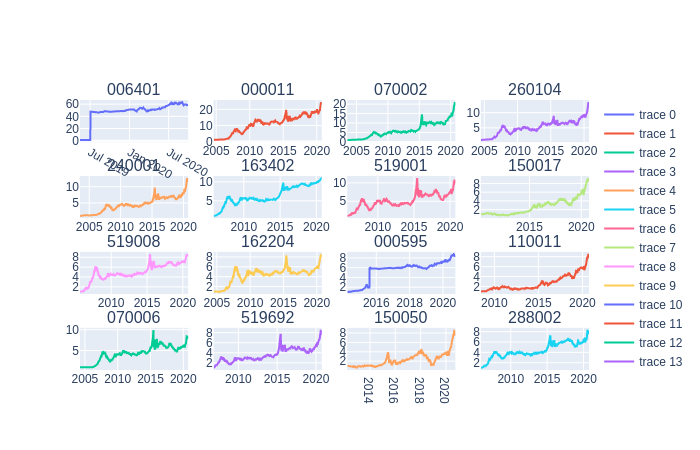

In [14]:
lstcodes = dfFundResults2.sort_values(by='totalReturn', ascending=False)['code'][0:16].tolist()
libtrdb2.showCNFunds(trdb2cfg, lstcodes, 4, 4)

我们可以看到，会有一些基金大量的回报都在一天以内，接下来我们看能不能把他们筛选出来

In [15]:
pd.DataFrame(dfFundResults2, columns=['code', 'totalReturn', 'annualizedReturns', 'sharpe', 'perValidData', 'durationYear', 'sdday', 'meanday', 'maxupday', 'permaxupday', 'offsdupday']).sort_values(by='offsdupday', ascending=False)[0:300]

code  totalReturn  annualizedReturns   sharpe  perValidData  \
5819  160805      1.62080            0.11806  0.43014       0.46591   
6858  519021      0.89947            0.06676  0.14978       0.46069   
6725  510220      0.37206            0.03846  0.01305       0.18281   
6729  510300      0.85689            0.10191  0.13407       0.16018   
5620  150301      0.33516            0.06319  4.06473       0.95161   
5335  070005      1.36900            0.07952  1.52357       0.96908   
6731  510330      1.07449            0.13853  0.20981       0.14789   
6753  510880      1.23661            0.08936  0.18886       0.26313   
6049  164206      0.81970            0.08397  0.29088       0.97866   
5618  150299      0.29549            0.05571  4.46251       0.95161   
359   000595      7.07041            1.08890  2.34771       0.29322   
5823  160812      0.29979            0.04617  0.01949       0.28787   
500   000914      0.43812            0.07575  1.19827       0.72874   
837   001380      0.93343            0.17445  0.92670       0.89441   
1335  002068      0.53902            0.11065  0.45278       0.73239   
628   001110      0.79930            0.14421  1.26743       0.93030   
1902  002881      1.03860            0.24223  0.78375       0.93213   
6290  233005      1.02000            0.09488  2.28077       0.97031   
7304  675043      0.30207            0.07375  0.80837       0.96815   
1398  002163      1.25202            0.25789  0.71117       0.84360   
1416  002188      0.20300            0.04208  0.50884       0.99158   
1657  002533      0.42084            0.09344  1.00375       0.93098   
1656  002529      0.29350            0.07199  0.65243       0.95053   
2519  003838      0.35297            0.09196  0.96246       1.00319   
786   001315      1.62649            0.30744  1.39028       0.95578   
2460  003741      0.46290            0.12008  0.68204       0.95143   
7231  590010      0.45900            0.05846  0.81202       0.97382   
2254  003411      0.29587            0.07397  0.55287       0.97602   
605   001065      0.35809            0.04584  0.26142       0.92750   
606   001066      0.35809            0.04584  0.26113       0.92543   
2255  003412      0.24527            0.06132  0.38852       0.97602   
402   000706      0.66400            0.10733  0.22282       0.93690   
2488  003793      1.52720            0.41414  0.93488       0.90220   
2307  003498      0.28090            0.07366  0.77352       1.00429   
2227  003371      0.21250            0.05409  0.87484       0.98871   
1328  002061      1.57536            0.32340  1.10695       0.72310   
2759  004238      0.21940            0.06122  1.22999       0.91381   
1380  002141      0.19184            0.03943  0.01283       0.87988   
2059  003142      1.65273            0.39977  1.06404       0.93435   
2312  003503      0.31731            0.08332  0.75670       0.98071   
1425  002199      0.87700            0.18105  0.45242       0.73018   
1326  002059      1.29921            0.26671  0.76766       0.69901   
1415  002186      0.57590            0.11910  0.58147       0.84353   
2216  003349      0.32970            0.08392  0.58004       0.98973   
1351  002091      0.32057            0.06588  0.02416       0.84922   
5651  159903      0.07618            0.00705 -0.07920       0.20449   
1970  002989      4.09071            0.98947  1.34377       0.21158   
6058  164510      0.26266            0.04010  0.20152       0.61056   
1974  002996      0.20840            0.05488  0.84133       1.00108   
842   001387      2.95391            0.60742  1.51765       0.97340   
808   001342      0.96200            0.18007  1.02189       0.94836   
2144  003254      0.95070            0.23654  0.68990       0.97220   
7086  519760      3.70098            0.76105  1.28798       0.85889   
933   001518      1.47510            0.28427  1.00380       0.95682   
7188  541005      0.32021            0.03437  0.18075       0.77623   
1242  001939      0.64164       

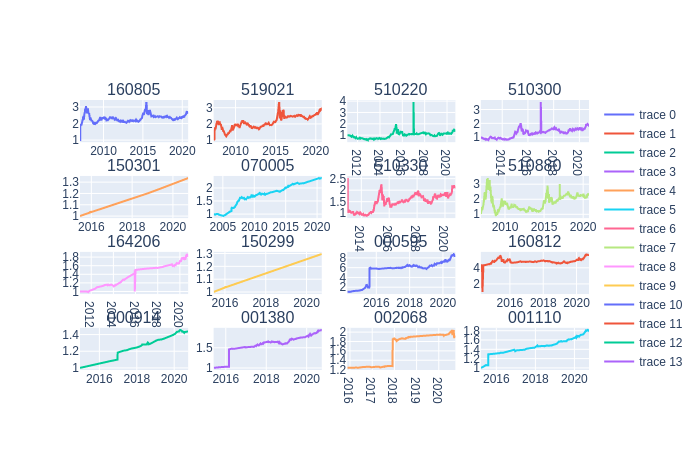

In [16]:
lstcodes = dfFundResults2.sort_values(by='offsdupday', ascending=False)['code'][0:16].tolist()
libtrdb2.showCNFunds(trdb2cfg, lstcodes, 4, 4)

In [26]:
libtrdb2.showCNFund(trdb2cfg, '233005')

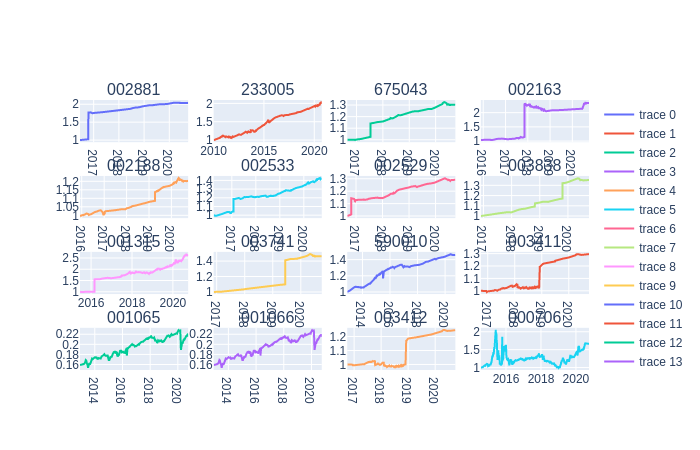

In [17]:
lstcodes = dfFundResults2.sort_values(by='offsdupday', ascending=False)['code'][16:32].tolist()
libtrdb2.showCNFunds(trdb2cfg, lstcodes, 4, 4)

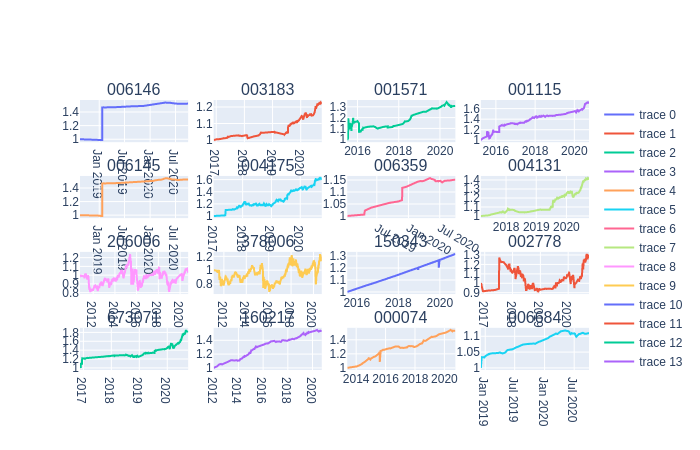

In [18]:
lstcodes = dfFundResults2.sort_values(by='offsdupday', ascending=False)['code'][200:216].tolist()
libtrdb2.showCNFunds(trdb2cfg, lstcodes, 4, 4)

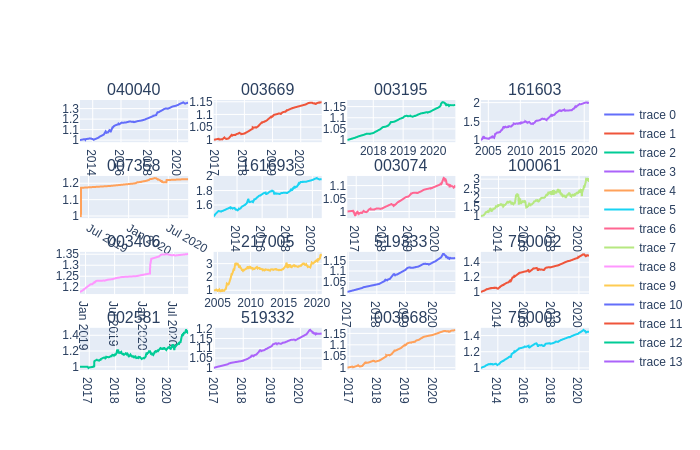

In [19]:
lstcodes = dfFundResults2.sort_values(by='offsdupday', ascending=False)['code'][300:316].tolist()
libtrdb2.showCNFunds(trdb2cfg, lstcodes, 4, 4)

In [28]:
dfFundResults2.loc[dfFundResults2['permaxupday'] >= 1].sort_values(by='annualizedReturns', ascending=False)

code  nums  totalReturn  maxDrawDown  mddStart    mddEnd  maxDrawup  \
4383  006401   342     58.17080      0.12944  20200305  20200323   62.60285   
2973  004638   223      3.74380      0.00475  20181016  20181029    3.74380   
4047  006011   564      5.83720      0.02890  20180731  20181008    5.96540   
4274  006279   450      3.57020      0.12183  20200305  20200323    3.73080   
4217  006210   526      2.84450      0.01496  20200430  20200714    2.88369   
7379  960033   489      2.53839      0.23485  20180528  20190103    3.63661   
359   000595  1591      7.07041      0.30108  20150603  20150708    7.52423   
2825  004355   832      3.72628      0.11559  20171113  20190103    3.77628   
2496  003803   892      3.73260      0.27077  20180124  20190103    3.78620   
1970  002989  1012      4.09071      0.08227  20180124  20190103    4.19409   
4721  006761   440      1.41306      0.03618  20200429  20200713    1.49275   
7086  519760  1193      3.70098      0.02177  20180123  20180209    3.72568   
2035  003105   986      3.04200      0.02935  20200305  20200323    3.11111   
2036  003106   986      3.03500      0.02966  20200305  20200323    3.10819   
842   001387  1171      2.95391      0.22352  20180522  20190103    3.56250   
4130  006109   482      1.16870      0.22690  20180827  20190103    2.03328   
1651  002521  1018      2.06950      0.01710  20180518  20181018    2.08730   
2488  003793   904      1.52720      0.02030  20200429  20200713    1.57170   
6731  510330  1889      1.07449      0.65310  20130109  20140320    1.55951   
6729  510300  2046      0.85689      0.65446  20161231  20190103    3.44327   
1351  002091  1194      0.32057      0.89961  20171211  20180817    9.88592   
5823  160812  1562      0.29979      0.76985  20140411  20140509    4.72100   
1380  002141  1194      0.19184      0.67565  20160115  20160129    2.93294   
6725  510220  2335      0.37206      0.78068  20161231  20181018    5.93917   
5627  150310  1284     -0.89500      0.95928  20150630  20181122   12.32927   
5629  150312  1284     -0.89500      0.96425  20150630  20181122   12.17222   
5599  150276  1318     -0.92300      0.95234  20150608  20181018    3.44262   

      mduStart    mduEnd   sharpe  annualizedReturns  annualizedVolatility  \
4383  20190606  20200902 12.78910           42.12766               3.29168   
2973  20180112  20181212  2.30788            3.74380               1.60919   
4047  20180531  20200429  1.97579            2.49775               1.24899   
4274  20181113  20200902  1.96826            1.89683               0.94847   
4217  20180820  20200430  1.57396            1.32429               0.82231   
7379  20190103  20200519  1.73048            1.27093               0.71710   
359   20140428  20200902  2.34771            1.08890               0.45104   
2825  20170324  20200918  1.32344            1.05762               0.77648   
2496  20161229  20200901  2.05260            0.99445               0.46987   
1970  20160826  20200902  1.34377            0.98947               0.71402   
4721  20181214  20200429  1.18695            0.78623               0.63712   
7086  20151127  20200921  1.28798            0.76105               0.56759   
2035  20161220  20200828  1.24929            0.73923               0.56771   
2036  20161220  20200828  1.24657            0.73753               0.56758   
842   20170116  20200806  1.51765            0.60742               0.38047   
4130  20190103  20200225  0.92965            0.54549               0.55450   
1651  20160527  20200817  0.88218            0.47627               0.50588   
2488  20170123  20200429  0.93488            0.41414               0.41089   
6731  20140320  20150608  0.20981            0.13853               0.51731   
6729  20121203  20161231  0.13407            0.10191               0.53638   
1351  20160426  20171211  0.02416            0.06588               1.48529   
5823  20140509  20200803  0.01949            0.04617               0.82953   
1

In [29]:
lstcodes = dfFundResults2.loc[dfFundResults2['permaxupday'] >= 1].sort_values(by='annualizedReturns', ascending=False)['code'].tolist()
len(lstcodes)

27

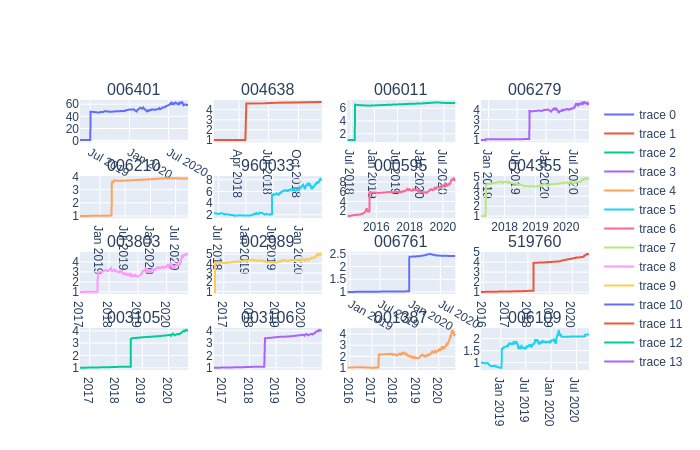

In [30]:
libtrdb2.showCNFunds(trdb2cfg, lstcodes, 4, 4)

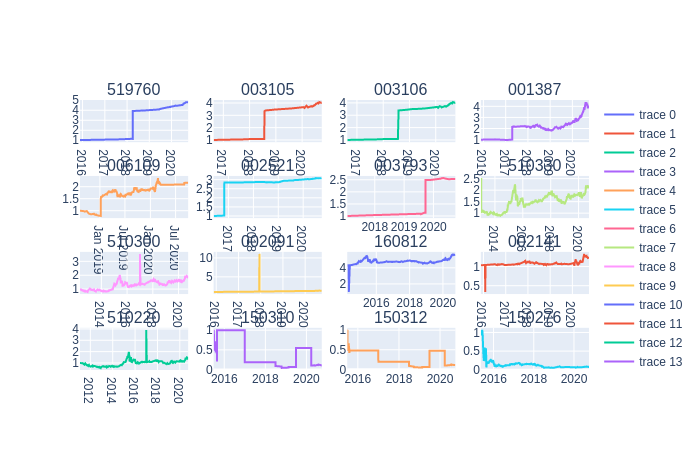

In [31]:
lstcodes = lstcodes[(27-16):27]
libtrdb2.showCNFunds(trdb2cfg, lstcodes, 4, 4)

In [32]:
libtrdb2.showCNFund(trdb2cfg, '510330')